## ____Other Networks____

#### __Graphs__

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sl

/usr/lib/python3/dist-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/usr/local/lib/python3.9/dist-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


#### ____GPA : Graph Products Authors References____ 

In [2]:
gpa=nx.read_weighted_edgelist('GPA.txt')
gpa

In [4]:
print(len(nx.nodes(gpa)))
nx.edges(gpa)

nodes0=dict(gpa.degree())    #creating a dictionary of nodes and degrees from the graph
nodes0
m0=len(gpa.edges());m0

86


124

In [3]:
Adj_M0 = nx.to_numpy_matrix(gpa)     #creating an adjacency matrix as from the node labelling in the graph
G0 = nx.from_numpy_matrix(Adj_M0)     #graph network from the adjacency matrix
A0=nx.adjacency_matrix(G0)
#A
#Adj_M = nx.adjacency_matrix(tele)
#show(NX.todense())

In [6]:
gpa.nodes()

NodeView(('2', '6', '9', '5', '14', '15', '1', '17', '7', '19', '21', '8', '22', '16', '24', '25', '29', '26', '27', '30', '31', '32', '11', '23', '33', '0', '34', '35', '36', '37', '38', '39', '20', '40', '41', '42', '43', '44', '10', '45', '47', '4', '48', '46', '13', '50', '51', '3', '52', '53', '54', '55', '56', '57', '12', '58', '59', '28', '60', '61', '63', '64', '65', '66', '67', '68', '70', '71', '72', '73', '74', '75', '76', '49', '69', '77', '78', '79', '80', '62', '81', '82', '18', '83', '84', '85'))

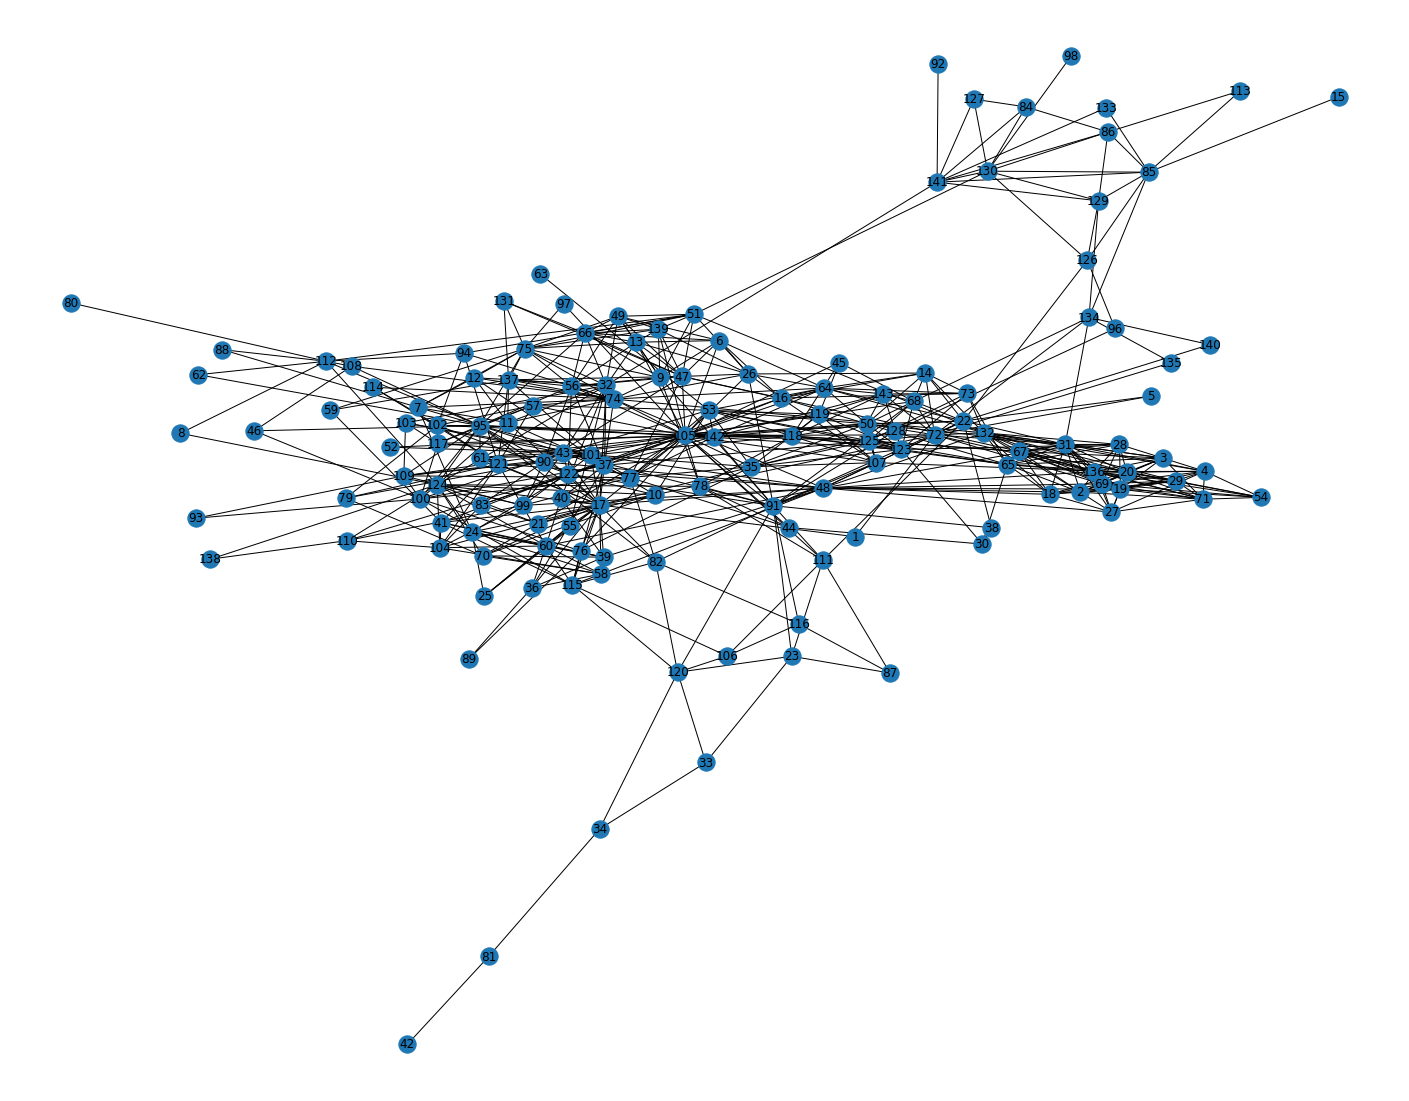

In [6]:
plt.figure(3,figsize=(25,20))   #setting the display feature sizes
nx.draw_networkx(tele)         #drawing a networkx graph
plt.axis('off')       #with no axis
plt.show()      #display the output  

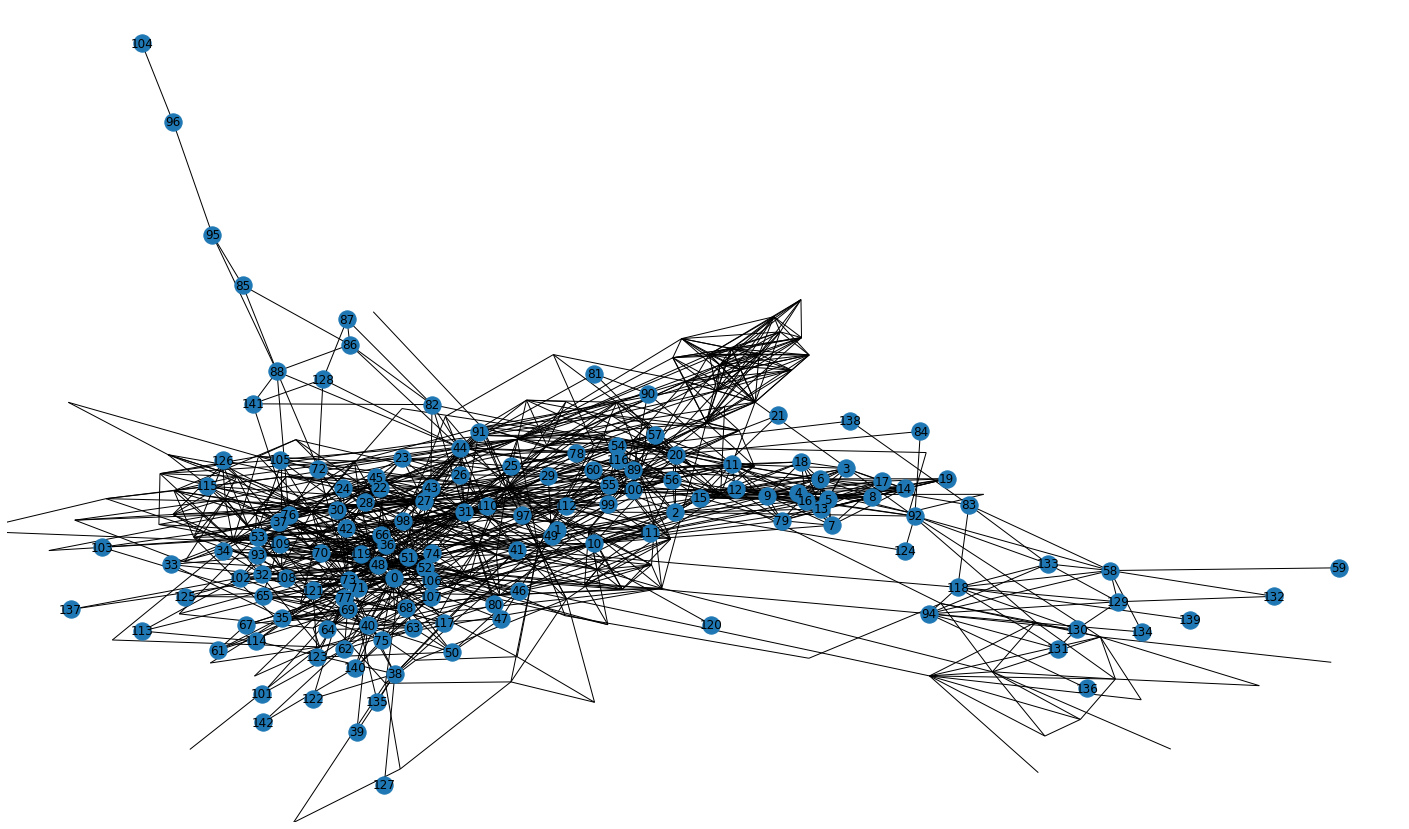

In [7]:
Adj_M = nx.to_numpy_matrix(tele)     #creating an adjacency matrix as from the node labelling in the graph
plt.figure(figsize=(25,15))      #adjusting the display size
G = nx.from_numpy_matrix(Adj_M)     #graph network from the adjacency matrix
pos = nx.spring_layout(G)       #new graph layout
nx.draw_networkx(G)       #drawing the graph
nx.draw_networkx_edges(G,pos)
plt.axis('off')        #eliminating the plot axes
plt.savefig("tele-enron.png")
plt.show()    #displaying

In [4]:
C0=sl.expm(A0)


/usr/local/lib/python3.9/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/usr/local/lib/python3.9/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


In [8]:
#comm1=nx.communicability(tele)
ass_coef_r0=nx.degree_assortativity_coefficient(gpa)
#comm1;
ass_coef_r0


-0.25580072036078527

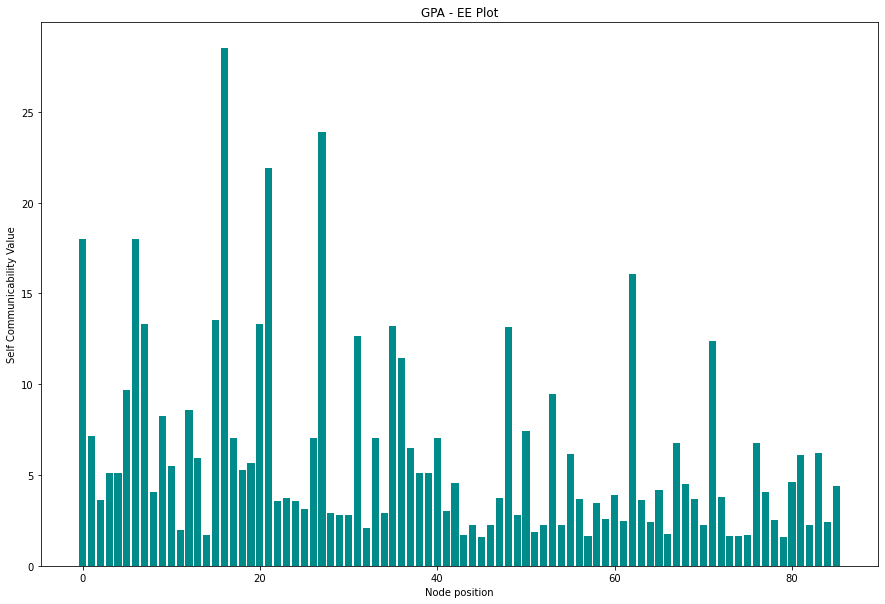

In [5]:
##creating graph from an upper triangular matrix
#plt.figure(figsize=(15,10)) 
##EE(SC)
plt.figure(4,figsize=(15,10))   #setting the display feature sizes
for i in range(len(G0.nodes())):
    for j in range(len(G0.nodes())):
        if i>j:
            C0[i,j]=0
#show(c)
        if C0[i,j]!=0:
            plt.bar(i,C0[i,j],color='darkcyan')
plt.title('GPA - EE Plot')
plt.xlabel('Node position')        
plt.ylabel('Self Communicability Value')
plt.savefig('gpa-SC.eps')
plt.show()

In [6]:
Comm0=C0.toarray()

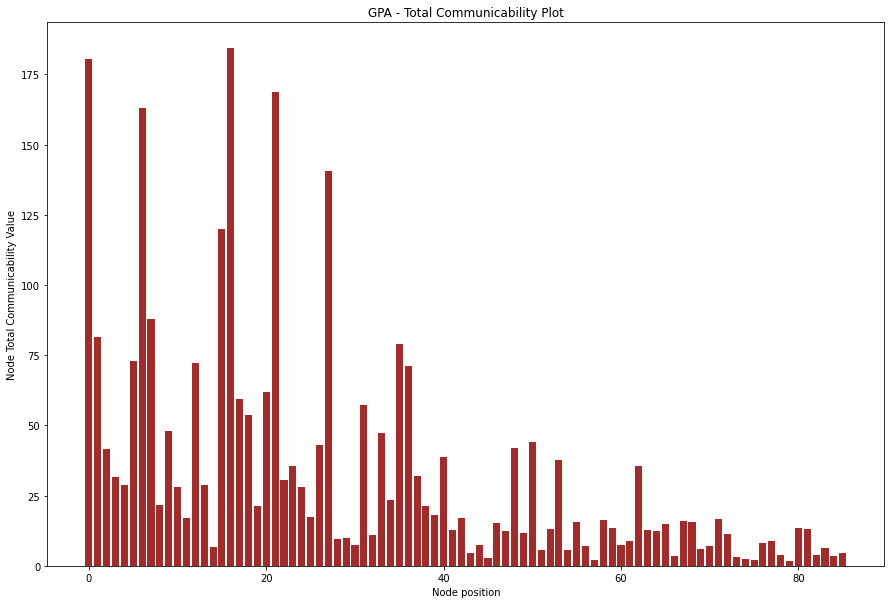

In [7]:
##Total Comm
plt.figure(4,figsize=(15,10))   #setting the display feature sizes
for h in list(G0.nodes()):
    plt.bar(h,sum(Comm0[h]), color='brown')
plt.title('GPA - Total Communicability Plot')
plt.xlabel('Node position')        
plt.ylabel('Node Total Communicability Value')
plt.savefig('gpa-TC.eps')
plt.show()

In [12]:
#C_f=C.todense()

nn0=len(G0.nodes())
s0=C0.diagonal().reshape(nn0,1)   #EE_n
t0=s0.transpose()
e0=np.ones((nn0,1))
f0=e0.transpose()

In [13]:
M0=sqrt(s0*f0+e0*t0-2*Comm0)
show(M0)

array([[0.        , 3.13707023, 2.98016755, ..., 4.014204  , 4.19831147,
        4.41081806],
       [4.70213653, 0.        , 1.98763961, ..., 2.94470738, 1.79928387,
        2.37338351],
       [4.64678136, 2.77974453, 0.        , ..., 2.8259619 , 2.33333744,
        2.7279651 ],
       ...,
       [4.91896611, 3.21412978, 3.13258988, ..., 0.        , 2.9109314 ,
        3.22708224],
       [4.5159362 , 2.55501123, 2.45164668, ..., 2.93499949, 0.        ,
        2.0938977 ],
       [4.72985019, 2.91648511, 2.82637126, ..., 3.25453915, 2.60566252,
        0.        ]])

In [14]:
g0 = nx.from_numpy_matrix(M0, create_using=nx.MultiGraph)
g0

In [15]:
am0=nx.adjacency_matrix(g0)
am0

<86x86 sparse matrix of type '<class 'numpy.float64'>'
	with 7310 stored elements in Compressed Sparse Row format>

In [16]:
print(nx.average_shortest_path_length(gpa))
nx.average_shortest_path_length(g0)


4.813953488372093


1.0

In [17]:
print(nx.transitivity(gpa),nx.average_clustering(gpa))
#nx.transitivity(g)  not implemented in multigraph  #nx.average_clustering(g)

0.27213822894168466 0.41487885499513394


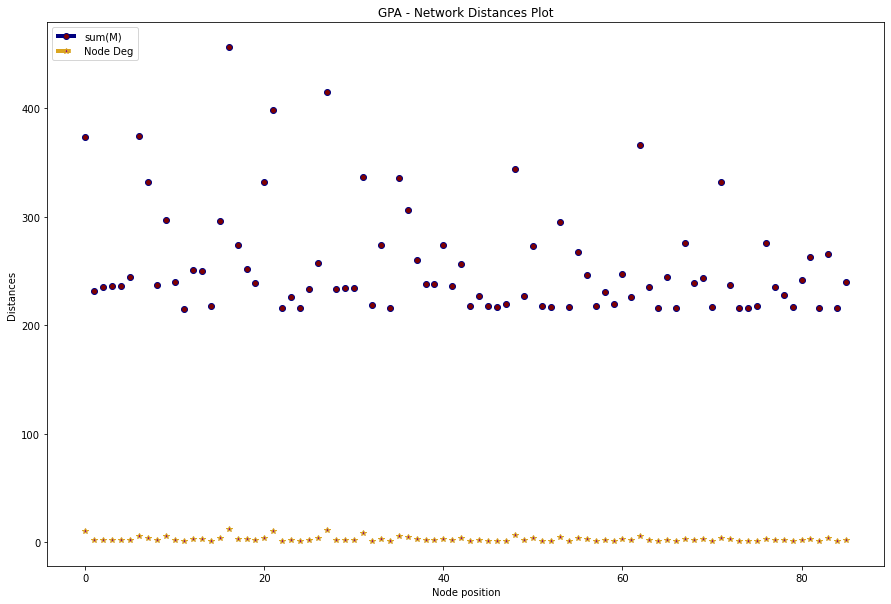

In [18]:
plt.figure(4,figsize=(15,10))   #setting the display feature sizes
for i in range(len(G0.nodes())):
    #for j in range(len(G.nodes())): 
    plt.plot(i,sum(am0[i]),color='navy',ls='-.',lw=4,marker='o',markerfacecolor='maroon')
    plt.plot(i,sum(A0[i]),color='goldenrod',ls='--',lw=4,marker='*',markerfacecolor='darkmagenta')

plt.title('GPA - Network Distances Plot')
plt.xlabel('Node position')        
plt.ylabel('Distances')
plt.savefig('gpa-D.png')
plt.legend(['sum(M)','Node Deg'],loc=2)
plt.show()

## node positions

In [8]:
degree_sequence0_p = [d for n, d in G0.degree()]  # degree sequence
list(set(degree_sequence0_p))
deg0_p=nx.degree(G0)
#y1 = list(comm1.values())

In [9]:
#5 nodes with the highest degree
#l_deg=comm.degree_sequence()[-1:]   #sorting out the list in ascending order
l_deg0_p=[min(degree_sequence0_p)]   #sorting out the list in ascending order
print('The lowest degree : ',l_deg0_p)     #displaying the last 5 values
low_deg_nodes0_p=[]
for i in deg0_p(G0):
    if i[1] in l_deg0_p:
        low_deg_nodes0_p.append(int(i[0]))
print('Their respective corresponding nodes position are',low_deg_nodes0_p)
l_deg0_p
per0=int(len(low_deg_nodes0_p))*100//len(nx.nodes(G0))
print(len(low_deg_nodes0_p),'\n',per0,'%')

The lowest degree :  [1]
Their respective corresponding nodes position are [11, 14, 22, 24, 32, 34, 43, 45, 46, 47, 51, 52, 54, 57, 59, 64, 66, 70, 73, 74, 75, 79, 82, 84]
24 
 27 %


In [10]:
#h_deg=[comm.degree_sequence()[0]]   #sorting out the list in ascending order
h_deg0_p=[max(degree_sequence0_p)]   #sorting out the list in ascending order
print('The highest degree : ',h_deg0_p)     #displaying the last 5 values
hubs0_p=[]
for i in deg0_p(G0):
    if i[1] in h_deg0_p:
        hubs0_p.append(int(i[0]))
print('Their respective corresponding nodes position : ',hubs0_p)
len(h_deg0_p)

The highest degree :  [12]
Their respective corresponding nodes position :  [16]


1

## nodes

In [11]:
degree_sequence0 = [d for n, d in gpa.degree()]  # degree sequence
list(set(degree_sequence0))
deg0=nx.degree(gpa)

In [12]:
l_deg0=[min(degree_sequence0)]   #sorting out the list in ascending order
#print('The lowest degree : ',l_deg0)     #displaying the last 5 values
low_deg_nodes0=[]
for i in deg0(gpa):
    if i[1] in l_deg0:
        low_deg_nodes0.append(int(i[0]))
print('Their respective corresponding nodes are',low_deg_nodes0)
l_deg0
#per1=int(len(low_deg_nodes1))*100//len(nx.nodes(tele))

Their respective corresponding nodes are [8, 24, 11, 33, 20, 41, 46, 50, 51, 3, 55, 56, 12, 28, 61, 67, 70, 74, 49, 69, 77, 62, 18, 84]


[1]

In [13]:
h_deg0=[max(degree_sequence0)]   #sorting out the list in ascending order
#print('The highest degree : ',h_deg1)     #displaying the last 5 values
hubs0=[]
for i in deg0(gpa):
    if i[1] in h_deg0:
        hubs0.append(int(i[0]))
print('Their respective corresponding nodes position : ',hubs0)

Their respective corresponding nodes position :  [29]


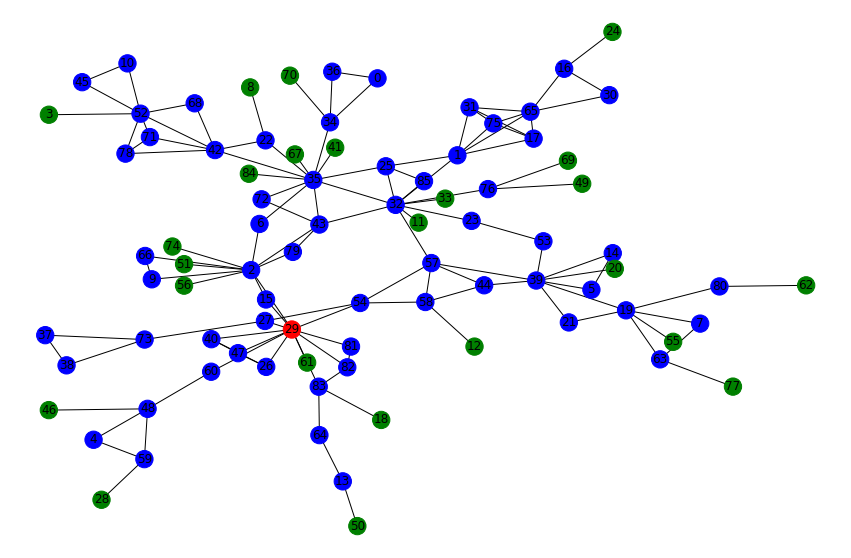

In [38]:
#highlights the network by partitioning into 3 communities depending on the connectivity
nodes0=dict(gpa.degree());nodes0    #creating a dictionary of nodes and degrees from the graph
deg0=list(nodes0.values())       #Getting the degree of particular nodes 
n0=len(deg0)
color = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(n0):     #iteration for partitioning
    if int(list(nodes0)[i]) in hubs0:      #highly connected nodes conditioning, the top 5 
        color.append('r')     
    elif int(list(nodes0)[i]) in low_deg_nodes0:                 #less connected
        color.append('g')
    else :
        color.append('b')
pos=nx.kamada_kawai_layout(gpa)      #redrawing the network
plt.figure(figsize=(15,10))    #plot figure
nx.draw_networkx(gpa,pos,node_color = color)      #depending on the color partition
plt.axis('off')
plt.savefig('gpa_part.png')
plt.show()      #displaying

In [31]:
sum(M0[29])


235.25407107376077

In [32]:
M0[29,29]
sum(Comm0[31])


57.27025113991703

In [33]:
##EE
for k in low_deg_nodes0_p:
    print(k,':',N(C0[k,k],digits=8),'and',N(sum(Comm0[k]),digits=8))
print('29:',N(C0[29,29],digits=8))

11 : 1.6998470 and 17.037379
14 : 1.6759341 and 6.6079308
22 : 2.3260507 and 30.718079
24 : 2.3260507 and 27.982740
32 : 2.0553913 and 11.033096
34 : 2.4058371 and 23.585916
43 : 1.7187643 and 4.5139607
45 : 1.5907043 and 2.6922101
46 : 2.2374224 and 15.367046
47 : 2.0485404 and 12.393126
51 : 1.8799009 and 5.6062964
52 : 2.2374224 and 13.223882
54 : 1.7644116 and 5.5695280
57 : 1.6654653 and 2.0514914
59 : 2.5695414 and 13.383547
64 : 2.4058371 and 12.306543
66 : 1.7378529 and 3.5675468
70 : 2.2374224 and 7.1867752
73 : 1.6585759 and 3.0784764
74 : 1.6585759 and 2.4199005
75 : 1.6710880 and 2.0702702
79 : 1.5986335 and 1.6051131
82 : 1.7547777 and 4.0074891
84 : 2.4058371 and 3.6083719
29: 2.7886341


In [34]:
for c in low_deg_nodes0_p:
    print(c,':',sum(M0[c]))

11 : 215.4774453592456
14 : 218.93219648326692
22 : 220.86675800916603
24 : 222.32421884196123
32 : 223.3320992210694
34 : 224.5597324707522
43 : 219.9335992112968
45 : 218.49124772537687
46 : 224.09429092687716
47 : 223.0086483513935
51 : 222.27607746501917
52 : 225.09876918153984
54 : 220.4261116233556
57 : 220.1560683107757
59 : 230.765995656017
64 : 228.46575384697096
66 : 220.8054497972966
70 : 227.93081576069906
73 : 219.47246593138811
74 : 219.87955734327377
75 : 220.2202972255873
79 : 219.15994607608542
82 : 220.9134923569836
84 : 232.26411682598138


## communicability and its distances

In [35]:

for I in hubs0_p:
    c0=list(Comm0[I-1])
    cd0=list(M0[I-1])
    for J in (low_deg_nodes0_p):
        print(I,':',J,' = ',N(c0[J-1],digits=8),'and',N(cd0[J-1],digits=8))

16 : 11  =  0.00000000 and 3.7107852
16 : 14  =  0.00000000 and 3.7736917
16 : 22  =  13.521676 and 2.2142344
16 : 24  =  3.0970538 and 2.6365539
16 : 32  =  1.2077918 and 4.5027336
16 : 34  =  0.18054631 and 4.0916138
16 : 43  =  0.018522123 and 3.8170104
16 : 45  =  0.0024599272 and 3.5036773
16 : 46  =  0.00026239472 and 3.4113934
16 : 47  =  0.47384108 and 3.3670707
16 : 51  =  1.0761831 and 3.9163017
16 : 52  =  0.036550349 and 3.4429966
16 : 54  =  3.6952925 and 3.4848461
16 : 57  =  0.0024655883 and 3.7013656
16 : 59  =  0.13709543 and 3.6351015
16 : 64  =  0.55635311 and 3.5411090
16 : 66  =  0.96195254 and 3.5074923
16 : 70  =  0.046223327 and 3.6906911
16 : 73  =  3.1856773 and 2.7296398
16 : 74  =  0.63904331 and 3.2292281
16 : 75  =  0.63904331 and 3.2292281
16 : 79  =  0.037129426 and 3.5363306
16 : 82  =  0.17567558 and 3.9754958
16 : 84  =  0.16205362 and 3.9914537


In [36]:
for J in low_deg_nodes0_p:
    lc0=list(Comm0[J-1])
    lcd0=list(M0[J-1])
    for j in low_deg_nodes0_p:
        #s=[]
        if j!=J & J<=j:
            #s.append(lc[j-1])
            print(J,':',j,'=',N(lc0[j-1],digits=8),'and',N(lcd0[J-1],digits=8))

11 : 14 = 0.0070801700 and 0.00000000
11 : 22 = 0.83120901 and 0.00000000
11 : 24 = 0.50087000 and 0.00000000
11 : 32 = 5.4716424 and 0.00000000
11 : 34 = 0.044097576 and 0.00000000
11 : 43 = 0.0045870884 and 0.00000000
11 : 45 = 0.00061744230 and 0.00000000
11 : 46 = 0.000066407316 and 0.00000000
11 : 47 = 0.010965289 and 0.00000000
11 : 51 = 0.78882443 and 0.00000000
11 : 52 = 1.2735055 and 0.00000000
11 : 54 = 2.4221538 and 0.00000000
11 : 57 = 0.00061888993 and 0.00000000
11 : 59 = 0.033317640 and 0.00000000
11 : 64 = 0.012396143 and 0.00000000
11 : 66 = 0.0065972617 and 0.00000000
11 : 70 = 0.028099872 and 0.00000000
11 : 73 = 0.14905138 and 0.00000000
11 : 74 = 0.022906361 and 0.00000000
11 : 75 = 0.022906361 and 0.00000000
11 : 79 = 1.3411324 and 0.00000000
11 : 82 = 0.042875194 and 0.00000000
11 : 84 = 0.039517984 and 0.00000000
14 : 22 = 1.3551050 and 0.00000000
14 : 24 = 0.22283582 and 0.00000000
14 : 32 = 0.049615590 and 0.00000000
14 : 34 = 0.0025026301 and 0.00000000
14 : 

In [37]:
for J in low_deg_nodes0_p:
    #lc1=list(Comm[J-1])
    lcd0=list(M0[J-1])
    for j in low_deg_nodes0_p:
        #s=[]
        if j!=J & J<=j:
            #s.append(lc[j-1])
            print(J,':',j,'=',N(lcd0[J-1],digits=8))

11 : 14 = 0.00000000
11 : 22 = 0.00000000
11 : 24 = 0.00000000
11 : 32 = 0.00000000
11 : 34 = 0.00000000
11 : 43 = 0.00000000
11 : 45 = 0.00000000
11 : 46 = 0.00000000
11 : 47 = 0.00000000
11 : 51 = 0.00000000
11 : 52 = 0.00000000
11 : 54 = 0.00000000
11 : 57 = 0.00000000
11 : 59 = 0.00000000
11 : 64 = 0.00000000
11 : 66 = 0.00000000
11 : 70 = 0.00000000
11 : 73 = 0.00000000
11 : 74 = 0.00000000
11 : 75 = 0.00000000
11 : 79 = 0.00000000
11 : 82 = 0.00000000
11 : 84 = 0.00000000
14 : 22 = 0.00000000
14 : 24 = 0.00000000
14 : 32 = 0.00000000
14 : 34 = 0.00000000
14 : 43 = 0.00000000
14 : 45 = 0.00000000
14 : 46 = 0.00000000
14 : 47 = 0.00000000
14 : 51 = 0.00000000
14 : 52 = 0.00000000
14 : 54 = 0.00000000
14 : 57 = 0.00000000
14 : 59 = 0.00000000
14 : 64 = 0.00000000
14 : 66 = 0.00000000
14 : 70 = 0.00000000
14 : 73 = 0.00000000
14 : 74 = 0.00000000
14 : 75 = 0.00000000
14 : 79 = 0.00000000
14 : 82 = 0.00000000
14 : 84 = 0.00000000
22 : 24 = 0.00000000
22 : 32 = 0.00000000
22 : 34 = 0.0

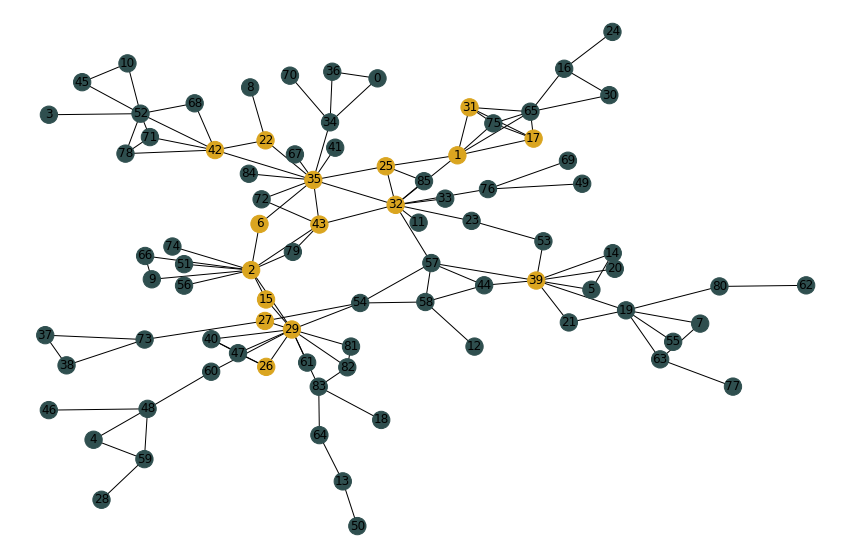

In [15]:
#highlights the network by partitioning into 3 communities depending on total communicabilities
nodes0=dict(gpa.degree());nodes0    #creating a dictionary of nodes and degrees from the graph
deg0=list(nodes0.values())       #Getting the degree of particular nodes 
n0=len(deg0)
color = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(n0):     #iteration for partitioning
    if sum(Comm0[i]) >= 50:      #highly connected nodes conditioning, the top 5 
        color.append('goldenrod')     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        color.append('darkslategrey')
pos=nx.kamada_kawai_layout(gpa)      #redrawing the network
plt.figure(figsize=(15,10))    #plot figure
nx.draw_networkx(gpa,pos,node_color = color)      #depending on the color partition
plt.axis('off')
plt.savefig('gpa_comm_p.png')
nx.write_gexf(gpa, "gpa_comm_p.gexf")
plt.show()

In [47]:
ldeg0=[]
hdeg0 = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(len(G0.nodes)):     #iteration for partitioning
    if sum(Comm0[i]) >= 50:      #highly connected nodes conditioning, the top 5 
        hdeg0.append(degree_sequence0[i])     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        ldeg0.append(degree_sequence0[i])
print(set(hdeg0),'\n','\n',set(ldeg0),'\n',set(hdeg0)&set(ldeg0))

{2, 3, 4, 5, 6, 8, 10, 11, 12} 
 
 {1, 2, 3, 4, 5, 6, 7} 
 {2, 3, 4, 5, 6}


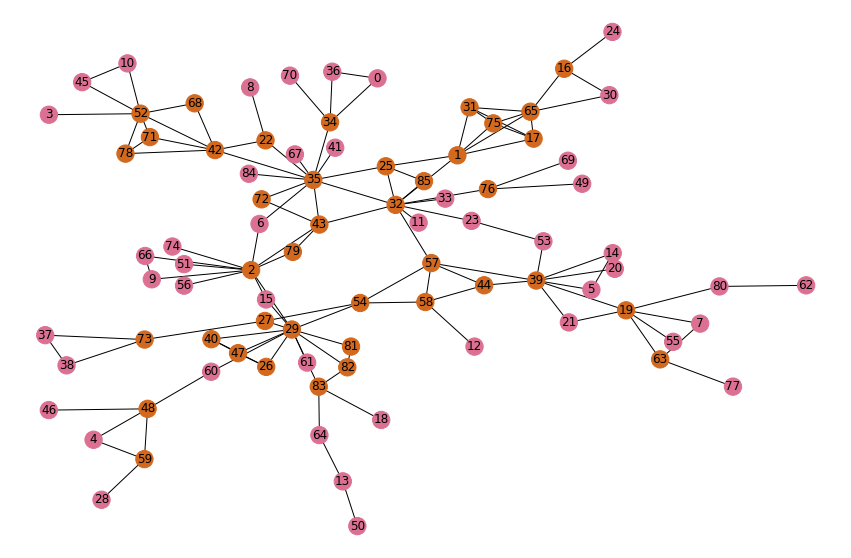

In [45]:
#highlights the network by partitioning into 3 communities depending on the total communicability distances
nodes0=dict(gpa.degree());nodes0    #creating a dictionary of nodes and degrees from the graph
deg0=list(nodes0.values())       #Getting the degree of particular nodes 
n0=len(deg0)
color = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(n0):     #iteration for partitioning
    if sum(M0[i]) >= 250:      #highly connected nodes conditioning, the top 5 
        color.append('chocolate')     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        color.append('palevioletred')
pos=nx.kamada_kawai_layout(gpa)      #redrawing the network
plt.figure(figsize=(15,10))    #plot figure
nx.draw_networkx(gpa,pos,node_color = color)      #depending on the color partition
plt.axis('off')
plt.savefig('gpa_p-comm_d.png')
plt.show()

In [49]:
Ldeg0=[]
Hdeg0 = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(len(G0.nodes)):     #iteration for partitioning
    if sum(M0[i]) >= 250:      #highly connected nodes conditioning, the top 5 
        Hdeg0.append(degree_sequence0[i])     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        Hdeg0.append(degree_sequence0[i])
print(set(Hdeg0),'\n','\n',set(Ldeg0),'\n',set(Hdeg0)&set(Ldeg0))

{1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12} 
 
 set() 
 set()


## Path Preservations

In [50]:
#for dis in nx.shortest_path_length(tele):
    #show(dis)
#print('\n','\n')
for l0 in nx.all_pairs_shortest_path(gpa,1):
    show(l0)
#print('\n','\n')    
#type(l)

('2',
 {'2': ['2'],
  '6': ['2', '6'],
  '9': ['2', '9'],
  '15': ['2', '15'],
  '29': ['2', '29'],
  '43': ['2', '43'],
  '51': ['2', '51'],
  '56': ['2', '56'],
  '66': ['2', '66'],
  '74': ['2', '74'],
  '79': ['2', '79']})

('6', {'6': ['6'], '2': ['6', '2'], '35': ['6', '35']})

('9', {'9': ['9'], '2': ['9', '2'], '66': ['9', '66']})

('5', {'5': ['5'], '14': ['5', '14'], '39': ['5', '39']})

('14', {'14': ['14'], '5': ['14', '5'], '39': ['14', '39']})

('15', {'15': ['15'], '2': ['15', '2'], '29': ['15', '29']})

('1',
 {'1': ['1'],
  '17': ['1', '17'],
  '25': ['1', '25'],
  '31': ['1', '31'],
  '32': ['1', '32'],
  '65': ['1', '65'],
  '75': ['1', '75']})

('17',
 {'17': ['17'],
  '1': ['17', '1'],
  '31': ['17', '31'],
  '65': ['17', '65'],
  '75': ['17', '75']})

('7', {'7': ['7'], '19': ['7', '19'], '63': ['7', '63']})

('19',
 {'19': ['19'],
  '7': ['19', '7'],
  '21': ['19', '21'],
  '39': ['19', '39'],
  '55': ['19', '55'],
  '63': ['19', '63'],
  '80': ['19', '80']})

('21', {'21': ['21'], '19': ['21', '19'], '39': ['21', '39']})

('8', {'8': ['8'], '22': ['8', '22']})

('22',
 {'22': ['22'], '8': ['22', '8'], '35': ['22', '35'], '42': ['22', '42']})

('16',
 {'16': ['16'], '24': ['16', '24'], '30': ['16', '30'], '65': ['16', '65']})

('24', {'24': ['24'], '16': ['24', '16']})

('25',
 {'25': ['25'],
  '1': ['25', '1'],
  '32': ['25', '32'],
  '35': ['25', '35'],
  '85': ['25', '85']})

('29',
 {'29': ['29'],
  '2': ['29', '2'],
  '15': ['29', '15'],
  '26': ['29', '26'],
  '27': ['29', '27'],
  '40': ['29', '40'],
  '47': ['29', '47'],
  '54': ['29', '54'],
  '60': ['29', '60'],
  '61': ['29', '61'],
  '81': ['29', '81'],
  '82': ['29', '82'],
  '83': ['29', '83']})

('26',
 {'26': ['26'], '29': ['26', '29'], '40': ['26', '40'], '47': ['26', '47']})

('27',
 {'27': ['27'], '29': ['27', '29'], '54': ['27', '54'], '73': ['27', '73']})

('30', {'30': ['30'], '16': ['30', '16'], '65': ['30', '65']})

('31',
 {'31': ['31'],
  '1': ['31', '1'],
  '17': ['31', '17'],
  '65': ['31', '65'],
  '75': ['31', '75']})

('32',
 {'32': ['32'],
  '1': ['32', '1'],
  '11': ['32', '11'],
  '23': ['32', '23'],
  '25': ['32', '25'],
  '33': ['32', '33'],
  '35': ['32', '35'],
  '43': ['32', '43'],
  '57': ['32', '57'],
  '76': ['32', '76'],
  '85': ['32', '85']})

('11', {'11': ['11'], '32': ['11', '32']})

('23', {'23': ['23'], '32': ['23', '32'], '53': ['23', '53']})

('33', {'33': ['33'], '32': ['33', '32']})

('0', {'0': ['0'], '34': ['0', '34'], '36': ['0', '36']})

('34',
 {'34': ['34'],
  '0': ['34', '0'],
  '35': ['34', '35'],
  '36': ['34', '36'],
  '70': ['34', '70']})

('35',
 {'35': ['35'],
  '6': ['35', '6'],
  '22': ['35', '22'],
  '25': ['35', '25'],
  '32': ['35', '32'],
  '34': ['35', '34'],
  '41': ['35', '41'],
  '42': ['35', '42'],
  '43': ['35', '43'],
  '67': ['35', '67'],
  '72': ['35', '72'],
  '84': ['35', '84']})

('36', {'36': ['36'], '0': ['36', '0'], '34': ['36', '34']})

('37', {'37': ['37'], '38': ['37', '38'], '73': ['37', '73']})

('38', {'38': ['38'], '37': ['38', '37'], '73': ['38', '73']})

('39',
 {'39': ['39'],
  '5': ['39', '5'],
  '14': ['39', '14'],
  '19': ['39', '19'],
  '20': ['39', '20'],
  '21': ['39', '21'],
  '44': ['39', '44'],
  '53': ['39', '53'],
  '57': ['39', '57']})

('20', {'20': ['20'], '39': ['20', '39']})

('40',
 {'40': ['40'], '26': ['40', '26'], '29': ['40', '29'], '47': ['40', '47']})

('41', {'41': ['41'], '35': ['41', '35']})

('42',
 {'42': ['42'],
  '22': ['42', '22'],
  '35': ['42', '35'],
  '52': ['42', '52'],
  '68': ['42', '68'],
  '71': ['42', '71'],
  '78': ['42', '78']})

('43',
 {'43': ['43'],
  '2': ['43', '2'],
  '32': ['43', '32'],
  '35': ['43', '35'],
  '72': ['43', '72'],
  '79': ['43', '79']})

('44',
 {'44': ['44'], '39': ['44', '39'], '57': ['44', '57'], '58': ['44', '58']})

('10', {'10': ['10'], '45': ['10', '45'], '52': ['10', '52']})

('45', {'45': ['45'], '10': ['45', '10'], '52': ['45', '52']})

('47',
 {'47': ['47'], '26': ['47', '26'], '29': ['47', '29'], '40': ['47', '40']})

('4', {'4': ['4'], '48': ['4', '48'], '59': ['4', '59']})

('48',
 {'48': ['48'],
  '4': ['48', '4'],
  '46': ['48', '46'],
  '59': ['48', '59'],
  '60': ['48', '60']})

('46', {'46': ['46'], '48': ['46', '48']})

('13', {'13': ['13'], '50': ['13', '50'], '64': ['13', '64']})

('50', {'50': ['50'], '13': ['50', '13']})

('51', {'51': ['51'], '2': ['51', '2']})

('3', {'3': ['3'], '52': ['3', '52']})

('52',
 {'52': ['52'],
  '3': ['52', '3'],
  '10': ['52', '10'],
  '42': ['52', '42'],
  '45': ['52', '45'],
  '68': ['52', '68'],
  '71': ['52', '71'],
  '78': ['52', '78']})

('53', {'53': ['53'], '23': ['53', '23'], '39': ['53', '39']})

('54',
 {'54': ['54'],
  '27': ['54', '27'],
  '29': ['54', '29'],
  '57': ['54', '57'],
  '58': ['54', '58']})

('55', {'55': ['55'], '19': ['55', '19']})

('56', {'56': ['56'], '2': ['56', '2']})

('57',
 {'57': ['57'],
  '32': ['57', '32'],
  '39': ['57', '39'],
  '44': ['57', '44'],
  '54': ['57', '54'],
  '58': ['57', '58']})

('12', {'12': ['12'], '58': ['12', '58']})

('58',
 {'58': ['58'],
  '12': ['58', '12'],
  '44': ['58', '44'],
  '54': ['58', '54'],
  '57': ['58', '57']})

('59',
 {'59': ['59'], '4': ['59', '4'], '28': ['59', '28'], '48': ['59', '48']})

('28', {'28': ['28'], '59': ['28', '59']})

('60', {'60': ['60'], '29': ['60', '29'], '48': ['60', '48']})

('61', {'61': ['61'], '29': ['61', '29']})

('63',
 {'63': ['63'], '7': ['63', '7'], '19': ['63', '19'], '77': ['63', '77']})

('64', {'64': ['64'], '13': ['64', '13'], '83': ['64', '83']})

('65',
 {'65': ['65'],
  '1': ['65', '1'],
  '16': ['65', '16'],
  '17': ['65', '17'],
  '30': ['65', '30'],
  '31': ['65', '31'],
  '75': ['65', '75']})

('66', {'66': ['66'], '2': ['66', '2'], '9': ['66', '9']})

('67', {'67': ['67'], '35': ['67', '35']})

('68', {'68': ['68'], '42': ['68', '42'], '52': ['68', '52']})

('70', {'70': ['70'], '34': ['70', '34']})

('71',
 {'71': ['71'], '42': ['71', '42'], '52': ['71', '52'], '78': ['71', '78']})

('72', {'72': ['72'], '35': ['72', '35'], '43': ['72', '43']})

('73',
 {'73': ['73'], '27': ['73', '27'], '37': ['73', '37'], '38': ['73', '38']})

('74', {'74': ['74'], '2': ['74', '2']})

('75',
 {'75': ['75'],
  '1': ['75', '1'],
  '17': ['75', '17'],
  '31': ['75', '31'],
  '65': ['75', '65']})

('76',
 {'76': ['76'], '32': ['76', '32'], '49': ['76', '49'], '69': ['76', '69']})

('49', {'49': ['49'], '76': ['49', '76']})

('69', {'69': ['69'], '76': ['69', '76']})

('77', {'77': ['77'], '63': ['77', '63']})

('78',
 {'78': ['78'], '42': ['78', '42'], '52': ['78', '52'], '71': ['78', '71']})

('79', {'79': ['79'], '2': ['79', '2'], '43': ['79', '43']})

('80', {'80': ['80'], '19': ['80', '19'], '62': ['80', '62']})

('62', {'62': ['62'], '80': ['62', '80']})

('81', {'81': ['81'], '29': ['81', '29'], '82': ['81', '82']})

('82',
 {'82': ['82'], '29': ['82', '29'], '81': ['82', '81'], '83': ['82', '83']})

('18', {'18': ['18'], '83': ['18', '83']})

('83',
 {'83': ['83'],
  '18': ['83', '18'],
  '29': ['83', '29'],
  '64': ['83', '64'],
  '82': ['83', '82']})

('84', {'84': ['84'], '35': ['84', '35']})

('85', {'85': ['85'], '25': ['85', '25'], '32': ['85', '32']})

In [51]:
for d0 in nx.all_pairs_shortest_path_length(gpa,1):
    show(d0)
type(d0)

('2',
 {'2': 0,
  '51': 1,
  '29': 1,
  '15': 1,
  '56': 1,
  '6': 1,
  '79': 1,
  '74': 1,
  '43': 1,
  '66': 1,
  '9': 1})

('6', {'6': 0, '2': 1, '35': 1})

('9', {'9': 0, '2': 1, '66': 1})

('5', {'5': 0, '39': 1, '14': 1})

('14', {'14': 0, '5': 1, '39': 1})

('15', {'15': 0, '2': 1, '29': 1})

('1', {'1': 0, '75': 1, '32': 1, '25': 1, '65': 1, '31': 1, '17': 1})

('17', {'17': 0, '1': 1, '75': 1, '31': 1, '65': 1})

('7', {'7': 0, '19': 1, '63': 1})

('19', {'19': 0, '39': 1, '7': 1, '63': 1, '21': 1, '80': 1, '55': 1})

('21', {'21': 0, '39': 1, '19': 1})

('8', {'8': 0, '22': 1})

('22', {'22': 0, '35': 1, '8': 1, '42': 1})

('16', {'16': 0, '30': 1, '24': 1, '65': 1})

('24', {'24': 0, '16': 1})

('25', {'25': 0, '1': 1, '35': 1, '85': 1, '32': 1})

('29',
 {'29': 0,
  '47': 1,
  '2': 1,
  '61': 1,
  '60': 1,
  '15': 1,
  '82': 1,
  '40': 1,
  '83': 1,
  '27': 1,
  '26': 1,
  '81': 1,
  '54': 1})

('26', {'26': 0, '47': 1, '29': 1, '40': 1})

('27', {'27': 0, '29': 1, '73': 1, '54': 1})

('30', {'30': 0, '65': 1, '16': 1})

('31', {'31': 0, '1': 1, '75': 1, '65': 1, '17': 1})

('32',
 {'32': 0,
  '76': 1,
  '35': 1,
  '23': 1,
  '25': 1,
  '85': 1,
  '57': 1,
  '33': 1,
  '1': 1,
  '11': 1,
  '43': 1})

('11', {'11': 0, '32': 1})

('23', {'23': 0, '53': 1, '32': 1})

('33', {'33': 0, '32': 1})

('0', {'0': 0, '36': 1, '34': 1})

('34', {'34': 0, '36': 1, '35': 1, '0': 1, '70': 1})

('35',
 {'35': 0,
  '34': 1,
  '42': 1,
  '32': 1,
  '25': 1,
  '67': 1,
  '41': 1,
  '6': 1,
  '84': 1,
  '43': 1,
  '22': 1,
  '72': 1})

('36', {'36': 0, '34': 1, '0': 1})

('37', {'37': 0, '73': 1, '38': 1})

('38', {'38': 0, '37': 1, '73': 1})

('39',
 {'39': 0,
  '19': 1,
  '20': 1,
  '21': 1,
  '53': 1,
  '5': 1,
  '57': 1,
  '44': 1,
  '14': 1})

('20', {'20': 0, '39': 1})

('40', {'40': 0, '26': 1, '47': 1, '29': 1})

('41', {'41': 0, '35': 1})

('42', {'42': 0, '68': 1, '35': 1, '78': 1, '71': 1, '52': 1, '22': 1})

('43', {'43': 0, '2': 1, '35': 1, '32': 1, '79': 1, '72': 1})

('44', {'44': 0, '57': 1, '39': 1, '58': 1})

('10', {'10': 0, '52': 1, '45': 1})

('45', {'45': 0, '10': 1, '52': 1})

('47', {'47': 0, '26': 1, '29': 1, '40': 1})

('4', {'4': 0, '59': 1, '48': 1})

('48', {'48': 0, '59': 1, '60': 1, '4': 1, '46': 1})

('46', {'46': 0, '48': 1})

('13', {'13': 0, '50': 1, '64': 1})

('50', {'50': 0, '13': 1})

('51', {'51': 0, '2': 1})

('3', {'3': 0, '52': 1})

('52', {'52': 0, '10': 1, '68': 1, '78': 1, '42': 1, '3': 1, '71': 1, '45': 1})

('53', {'53': 0, '39': 1, '23': 1})

('54', {'54': 0, '57': 1, '58': 1, '29': 1, '27': 1})

('55', {'55': 0, '19': 1})

('56', {'56': 0, '2': 1})

('57', {'57': 0, '39': 1, '32': 1, '58': 1, '44': 1, '54': 1})

('12', {'12': 0, '58': 1})

('58', {'58': 0, '57': 1, '12': 1, '44': 1, '54': 1})

('59', {'59': 0, '28': 1, '4': 1, '48': 1})

('28', {'28': 0, '59': 1})

('60', {'60': 0, '29': 1, '48': 1})

('61', {'61': 0, '29': 1})

('63', {'63': 0, '77': 1, '19': 1, '7': 1})

('64', {'64': 0, '83': 1, '13': 1})

('65', {'65': 0, '75': 1, '30': 1, '16': 1, '1': 1, '31': 1, '17': 1})

('66', {'66': 0, '2': 1, '9': 1})

('67', {'67': 0, '35': 1})

('68', {'68': 0, '42': 1, '52': 1})

('70', {'70': 0, '34': 1})

('71', {'71': 0, '78': 1, '42': 1, '52': 1})

('72', {'72': 0, '43': 1, '35': 1})

('73', {'73': 0, '37': 1, '38': 1, '27': 1})

('74', {'74': 0, '2': 1})

('75', {'75': 0, '1': 1, '31': 1, '17': 1, '65': 1})

('76', {'76': 0, '69': 1, '49': 1, '32': 1})

('49', {'49': 0, '76': 1})

('69', {'69': 0, '76': 1})

('77', {'77': 0, '63': 1})

('78', {'78': 0, '42': 1, '71': 1, '52': 1})

('79', {'79': 0, '2': 1, '43': 1})

('80', {'80': 0, '19': 1, '62': 1})

('62', {'62': 0, '80': 1})

('81', {'81': 0, '29': 1, '82': 1})

('82', {'82': 0, '83': 1, '81': 1, '29': 1})

('18', {'18': 0, '83': 1})

('83', {'83': 0, '64': 1, '29': 1, '82': 1, '18': 1})

('84', {'84': 0, '35': 1})

('85', {'85': 0, '25': 1, '32': 1})

<class 'tuple'>

In [52]:
D0=list(d0)
print(d0)
Sd0=list(D0[1].keys())
Sd0[1:]
#Sd[1]

('85', {'85': 0, '25': 1, '32': 1})


['25', '32']

In [58]:
for s0 in (1,len(Sd0)-1):
    print(Sd0[0],':',Sd0[s0],'=',N(M0[int(Sd0[0]),int(Sd0[s0])],digits=8))

85 : 25 = 2.6974604
85 : 32 = 2.5375247


In [59]:
for d0 in nx.all_pairs_shortest_path_length(gpa,1):
    D0=list(d0)
    Sd0=list(D0[1].keys()) 
    for s0 in (1,len(Sd0)-1):
    #for s in (1,len(Sd)-1):
        print(Sd0[0],':',Sd0[s0],'=',N(M0[int(Sd0[0]),int(Sd0[s0])],digits=8))

2 : 51 = 2.3412937
2 : 29 = 2.5175874
6 : 2 = 4.6462390


IndexError: list index out of range

In [82]:
cc=(nx.clustering(tele))
ct=list(cc.keys())
int(ct[0])
#for n in low_deg_nodes1:
    
    #print(list(nx.clustering(tele))[n])

17

In [ ]:
#long paths